# Importing the libraries

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from alpha_vantage.timeseries import TimeSeries
import time
from alpha_vantage.techindicators import TechIndicators

# API key and ticker symbol

In [39]:
api_key = 'HDHS7RJSLYNN07J7'
ticker = 'TSLA'

# Importing the dataset

In [40]:
ts = TimeSeries(key = api_key, output_format = 'pandas')
data, meta_data = ts.get_intraday(symbol = ticker, interval = '1min', outputsize = 'full')
print(data.head())

                     1. open  2. high   3. low  4. close  5. volume
date                                                               
2020-07-09 20:00:00  1393.45   1393.5  1393.45   1393.50     3400.0
2020-07-09 19:59:00  1394.00   1394.0  1394.00   1394.00      708.0
2020-07-09 19:58:00  1394.88   1394.9  1394.88   1394.90     1475.0
2020-07-09 19:57:00  1394.80   1394.8  1394.80   1394.80      680.0
2020-07-09 19:56:00  1394.70   1394.7  1394.50   1394.62     1329.0


# Importing technical indicators

In [58]:
period = 60
ti = TechIndicators(key = api_key, output_format='pandas')
df_sma, metadata_sma = ti.get_sma(symbol=ticker, interval='1min',
                                  time_period=period, series_type='close')
df_ema, metadata_ema = ti.get_ema(symbol=ticker, interval='1min',
                                  time_period=period, series_type='close')

In [59]:
print(df_sma.head())

                           SMA
date                          
2020-07-06 05:29:00  1278.4578
2020-07-06 05:30:00  1278.9495
2020-07-06 05:31:00  1279.2328
2020-07-06 05:38:00  1279.4495
2020-07-06 05:44:00  1279.5995


In [60]:
print(df_ema.head())

                           EMA
date                          
2020-07-06 05:29:00  1278.4578
2020-07-06 05:30:00  1278.3281
2020-07-06 05:31:00  1278.2845
2020-07-06 05:38:00  1278.2424
2020-07-06 05:44:00  1278.2345


# Combining technical endicator tables

In [65]:
df_sma.index = df_ema.index
df_ti = pd.concat([df_sma, df_ema], axis=1)

# Combining close and technical indicator tables

In [66]:
df_close = data['4. close'].iloc[period-1::]
df_close.index = df_ti.index

In [67]:
total_df = pd.concat([df_close, df_ti], axis = 1)
print(total_df.head())

                     4. close        SMA        EMA
date                                               
2020-07-06 05:29:00   1397.00  1278.4578  1278.4578
2020-07-06 05:30:00   1397.70  1278.9495  1278.3281
2020-07-06 05:31:00   1396.75  1279.2328  1278.2845
2020-07-06 05:38:00   1396.31  1279.4495  1278.2424
2020-07-06 05:44:00   1395.00  1279.5995  1278.2345


# Visualising trends

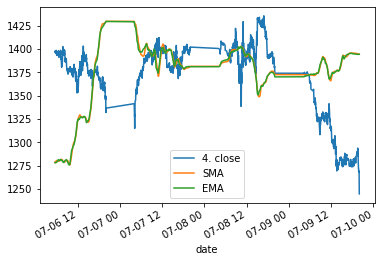

In [68]:
total_df.plot()
plt.show()